# GRT Full Analysis

In this notebook we perform a full analysis using the tools of gravray

In [1]:
from gravray import *
from gravray.util import *
from gravray.stats import *
from gravray.spice import *
from gravray.plot import *
from gravray.sampling import *
from gravray.orbit import *

from tqdm import tqdm
from matplotlib.colors import LogNorm

from sys import argv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib nbagg

## Initialize

In [3]:
dt=elTime(0)
Spice.loadKernels()
cneos=pd.read_csv("data/cneos_fireball_data_location.csv")
cneos.set_index("Name",inplace=True)

In [4]:
cneos.head(50)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Aloc,hloc,vimp,Ephemeris Date,lat,lon
Name,,,,,,,,,,,,,,,,
CNEOS-2013-02-15,2013-02-15 03:20:33,54.8N,61.1E,23.30,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0,99.896113,15.924142,-18.614242,02/15/2013 03:20:33 UTC,54.8,61.1
CNEOS-2018-12-18,2018-12-18 23:48:20,56.9N,172.4E,25.60,32.0,6.3,-3.0,-31.2,1.300000e+14,173.0,349.433476,68.586703,-31.970768,12/18/2018 23:48:20 UTC,56.9,172.4
CNEOS-2010-12-25,2010-12-25 23:24:00,38.0N,158.0E,26.00,18.1,18.0,-2.0,-4.0,2.000000e+13,33.0,147.196052,60.888747,-18.547237,12/25/2010 23:24:00 UTC,38.0,158.0
CNEOS-2009-10-08,2009-10-08 02:57:00,4.2S,120.6E,19.10,19.2,14.0,-16.0,-6.0,2.000000e+13,33.0,27.463598,67.457494,-22.090722,10/08/2009 02:57:00 UTC,-4.2,120.6
CNEOS-1994-02-01,1994-02-01 22:38:09,2.7N,164.1E,33.33,-1.0,0.0,0.0,0.0,1.820000e+13,30.0,0.000000,0.000000,-0.000000,02/01/1994 22:38:09 UTC,2.7,164.1
CNEOS-2009-11-21,2009-11-21 20:53:00,22.0S,29.2E,38.00,32.1,3.0,-17.0,27.0,1.000000e+13,18.0,144.561055,28.672847,-32.046841,11/21/2009 20:53:00 UTC,-22.0,29.2
CNEOS-2004-10-07,2004-10-07 13:14:43,27.3S,71.5E,35.00,19.2,-15.3,1.0,11.6,1.040000e+13,18.0,240.127781,27.211713,-19.226284,10/07/2004 13:14:43 UTC,-27.3,71.5
CNEOS-2010-07-06,2010-07-06 23:54:43,34.1S,174.5W,26.00,15.7,12.1,10.0,0.2,7.560000e+12,14.0,50.988395,43.867464,-15.698726,07/06/2010 23:54:43 UTC,-34.1,-174.5
CNEOS-2006-12-09,2006-12-09 06:31:12,26.2N,26.0E,26.50,15.9,4.9,-15.0,1.6,7.410000e+12,14.0,98.709425,4.490952,-15.860958,12/09/2006 06:31:12 UTC,26.2,26.0


## Location

In [5]:
body="EARTH"
earth=Body(body)

In [6]:
#argv[1]="CNEOS-2018-07-25"
argv[1]="Chelyabinsk"
#argv[1]="Viñales"
site=argv[1]

In [7]:
if re.search("CNEOS-",site):
    print("CNEOS Site")
    impact=cneos.loc[site]
    lon=impact["lon"]*Angle.Deg
    lat=impact["lat"]*Angle.Deg
    alt=impact["Altitude (km)"]*Const.km
    Aloc=impact["Aloc"]*Angle.Deg
    hloc=impact["hloc"]*Angle.Deg
    vimp=impact["vimp"]*Const.km/Const.s
    location=Location(earth,lon,lat,alt)
    datestring=impact["Ephemeris Date"].replace(" UTC","")
    fmt="%m/%d/%Y %H:%M:%S"

if site=="Bering_CNEOS":
    lon=172.4*Angle.Deg #rad
    lat=56.9*Angle.Deg #rad
    alt=25.6*Const.km #m
    vbod=np.array([6.3,-3.0,-31.2])*Const.km/Const.s
    location=Location(earth,lon,lat,alt)
    Aloc,hloc,vimp=location.vbod2loc(-vbod)
    datestring="2018-12-18 23:48:20"
    fmt="%Y-%m-%d %H:%M:%S"

if site=="Chelyabinsk_CNEOS":
    lon=61.1**Angle.Deg #rad
    lat=54.8*Angle.Deg #rad
    alt=23.3*Const.km #m
    vbod=np.array([+12.8,-13.3,-2.4])*Const.km/Const.s
    location=Location(earth,lon,lat,alt)
    Aloc,hloc,vimp=location.vbod2loc(-vbod)
    datestring="2013-02-15 03:20:33"
    fmt="%Y-%m-%d %H:%M:%S"

if site=="Chelyabinsk":
    lon=59.8703**Angle.Deg #rad
    lat=55.0958*Angle.Deg #rad
    alt=23.3*Const.km #m
    vimp=-18.6*Const.km/Const.s
    Aloc=103.5*Angle.Deg
    hloc=18.55*Angle.Deg
    location=Location(earth,lon,lat,alt)
    datestring="02/15/2013 03:20:34"
    fmt="%m/%d/%Y %H:%M:%S"

if site=="Viñales":
    lon=-83.8037*Angle.Deg #deg
    lat=+22.8820*Angle.Deg #deg
    alt=70.0*Const.km #m
    vimp=-16.9*Const.km/Const.s
    Aloc=178.9*Angle.Deg
    hloc=31.8*Angle.Deg
    location=Location(earth,lon,lat,alt)
    datestring="02/01/2019 18:17:10"
    fmt="%m/%d/%Y %H:%M:%S"

#Input conditions
print(f"Location: {site}")
print(f"\tDate: {datestring}")
print(f"\tlon. {lon*Angle.Rad:.4g}, lat. {lat*Angle.Rad:.4g}, alt. {alt/Const.km:.4g} km")
print(f"\tAloc = {Aloc*Angle.Rad:.4g}, hloc = {lat*Angle.Rad:.4g}, vimp = {vimp/Const.km} km/s")

#Common derivative
pref=f"siteanalysis-{site}"
tdb=Spice.str2tdb(datestring)
ray=GrtRay(location,Aloc,hloc,vimp)
ray.updateRay(tdb)
ray.propagateRay(tdb)
ray.terminal.calcUelements([Const.aphelion,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
locelements=ray.terminal.uelements
print(f"Terminal elements for {site}:",Util.transformElements(ray.terminal.elements,[1/Const.au,Angle.Rad]))
print("Unbound terminal elements:",locelements)

Location: Chelyabinsk
	Date: 02/15/2013 03:20:34
	lon. 61.54, lat. 55.1, alt. 23.3 km
	Aloc = 103.5, hloc = 55.1, vimp = -18.6 km/s
Terminal elements for Chelyabinsk: [  0.72231578   0.5297087    5.18079402 326.57568287 103.0150748
  24.56944643]
Unbound terminal elements: [ 0.89757661  0.11897496 -3.518794    2.27937803 -0.91414209 -2.61391129]


<IPython.core.display.Javascript object>


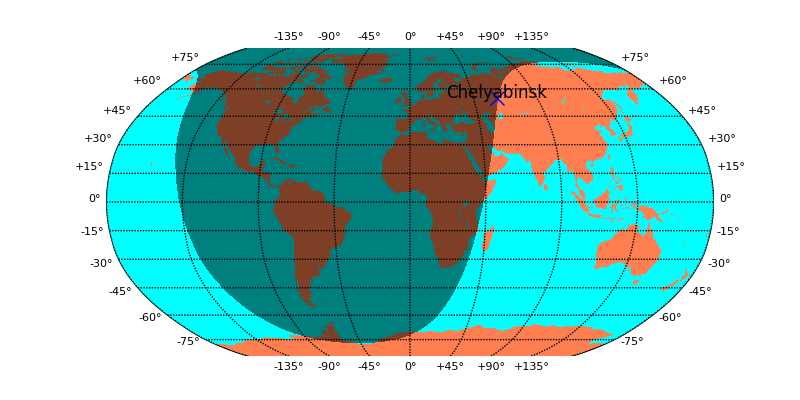

In [8]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
m=Map("surface")
m.drawmeridians.update(dict(fontsize=8))
m.drawparallels.update(dict(fontsize=8))
m.date=datetime.strptime(datestring,fmt)
m.drawMap(ax)

In [9]:
p=m.plotMap(lon*Angle.Rad,lat*Angle.Rad,marker='x',ms=10,color='b')
t=m.textMap(lon*Angle.Rad,lat*Angle.Rad,site,ha="center",fontsize=12)
fig.savefig(f"figures/{pref}-map-location.png")

## Generate directions in the sky

In [10]:
sample=Sample(100)
sample.genUnitHemisphere()
sample.purgeSample()
As=sample.pp[:,1]
hs=sample.pp[:,2]

<IPython.core.display.Javascript object>


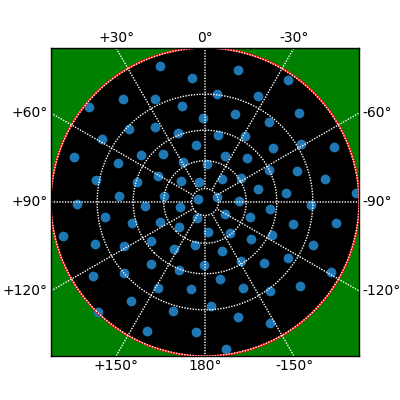

In [11]:
fig=plt.figure(figsize=(4,4))
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)

In [12]:
s=m.scatterMap(As*Angle.Rad,hs*Angle.Rad)

## Compute rays

In [13]:
#We have a distribution of points in N-d
#"""
weights=[0.6]
locs=[
    [0.5,0.5,-2.0],
    [2.0,0.3,-2.6]
]
scales=[
    [1.3,0.7,0.5],
    [0.4,0.9,1.6]
]
angles=[
    [-40.0*Angle.Deg,-86.0*Angle.Deg,0.0*Angle.Deg],
    [+80.0*Angle.Deg,-109.0*Angle.Deg,0.0*Angle.Deg]
]
ranges=[
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)],
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)]
]
#"""
"""
pref=f"siteanalysis_single-{site}"
#1 single MND
weights=[1.0]
locs=[
    [-2.0,0.3,-2.6]
]
scales=[
    [0.4,0.9,1.6]
]
angles=[
    [+0.0*Angle.Deg,0.0*Angle.Deg,0.0*Angle.Deg]
]
ranges=[
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)],
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)]
]
#"""
mnd=MultiVariate([1,1,1,0,0])
mnd.setUnflatten(weights,locs,scales,angles,ranges)

In [14]:
rays=pd.DataFrame()
for A,h in tqdm(zip(As,hs)):
    ray=GrtRay(location,A,h,vimp)
    ray.updateRay(tdb)
    try:
        ray.propagateRay(tdb)
        #J = |dEhel/dRimp| = |dchel/dRimp| x |dehel/dchel| x |dEhel/dehel| 
        detJ=ray.calcJacobianDeterminant()*\
             (1-ray.terminal.elements[1])*\
             Jacobians.calcDetMapJacobian(ray.terminal.elements,
                                          [Const.aphelion,1,np.pi,2*np.pi,2*np.pi,2*np.pi])[0]
        if ray.terminal.elements[1]<1:
            ray.terminal.calcUelements(maxvalues=[Const.aphelion,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
            x=ray.terminal.uelements[:5]
            ph=mnd.pdf(x)
        else:
            ph=0
    except AssertionError as e:
        detJ=0
        ph=0
    raydf=ray.packRay()
    raydf["detJ"]=np.abs(detJ)
    raydf["ph"]=ph
    raydf["pi"]=ph*np.abs(detJ)
    rays=pd.concat((rays,raydf))
rays.reset_index(inplace=True)

100it [00:04, 19.42it/s]


## Visualize orbits in Elements Space

In [15]:
Util.log=np.log

In [16]:
rays_bound=rays[rays["e"]<=1]
rays_bound["Q"]=Util.fin2Inf(rays_bound["q"])
rays_bound["E"]=Util.fin2Inf(rays_bound["e"])
rays_bound["I"]=Util.fin2Inf(rays_bound["i"],180)
rays_bound["O"]=Util.fin2Inf(rays_bound["W"],360)
rays_bound["P"]=Util.fin2Inf(rays_bound["w"],360)

In [17]:
rays_bound[["q","e","i","W","w"]].describe()

,q,e,i,W,w
count,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.602132,0.556586,14.041184,290.167896,178.738112
std,0.289942,0.187039,8.499153,72.698732,102.169996
min,0.148423,0.095530,0.056785,146.587606,1.418795
25%,0.304362,0.443470,6.330708,326.562880,111.815379
50%,0.641095,0.560516,13.693805,326.580292,179.968611
75%,0.892399,0.674807,21.067564,326.581425,249.631077
max,0.987249,0.968417,29.165952,326.582050,359.642441


In [18]:
elements=rays_bound[["Q","E","I","O","P"]]
elements.describe()

,Q,E,I,O,P
count,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.749043,0.278958,-2.792427,1.742189,-0.009494
std,1.738562,0.950268,1.074173,1.072317,1.999468
min,-1.747023,-2.247913,-8.061129,-0.375603,-5.532347
25%,-0.826613,-0.227089,-3.311741,2.278956,-0.797324
50%,0.580121,0.243256,-2.496887,2.279530,-0.000349
75%,2.115484,0.730009,-2.020745,2.279567,0.816156
max,4.349351,3.423046,-1.643178,2.279588,6.913566


<IPython.core.display.Javascript object>


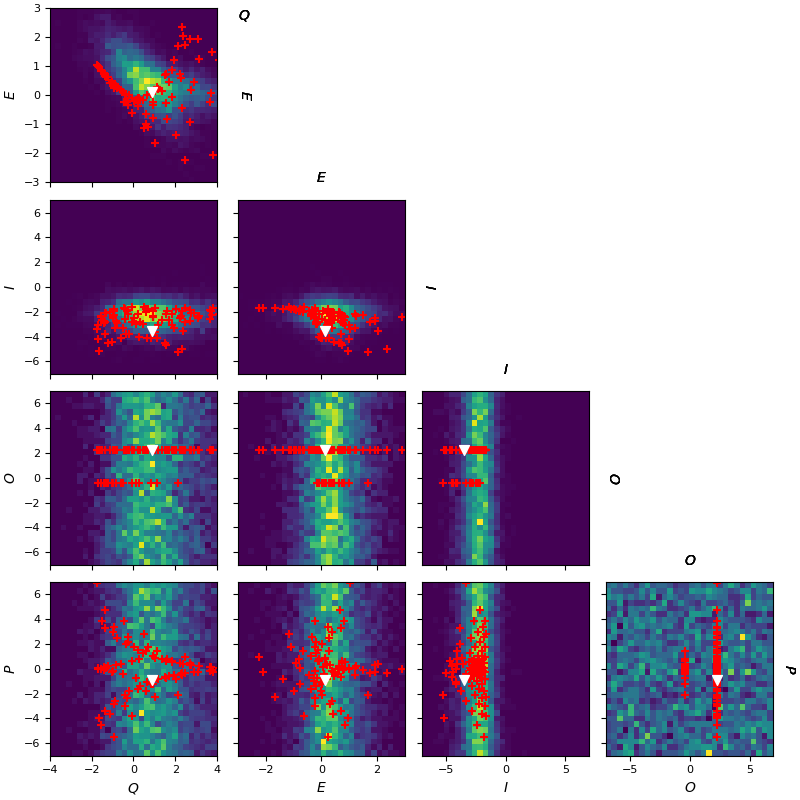

In [19]:
ps=mnd.rvs(10000)
properties=dict(
    Q=dict(label=r"$Q$",range=(-4,4)),
    E=dict(label=r"$E$",range=(-3,3)),
    I=dict(label=r"$I$",range=(-7,7)),
    O=dict(label=r"$O$",range=(-7,7)),
    P=dict(label=r"$P$",range=(-7,7)),
)
G=PlotGrid(properties,figsize=2)
h=G.plotHist(ps,bins=30)

In [20]:
s=G.scatterPlot(elements.values,color='r',marker='+')
s=G.scatterPlot(np.array([locelements[:5]]),color='w',marker='v',s=50)

In [21]:
G.fig.savefig(f"figures/{pref}-orbital-footprint.png")

## Visualize probability and Jacobian

In [22]:
rays["1/|log10(detJ)|"]=1/np.abs(np.log10(rays["detJ"]))
rays["1/|log10(ph)|"]=1/np.abs(np.log10(rays["ph"]))
rays["1/|log10(pi)|"]=1/np.abs(np.log10(rays["pi"]))

<IPython.core.display.Javascript object>


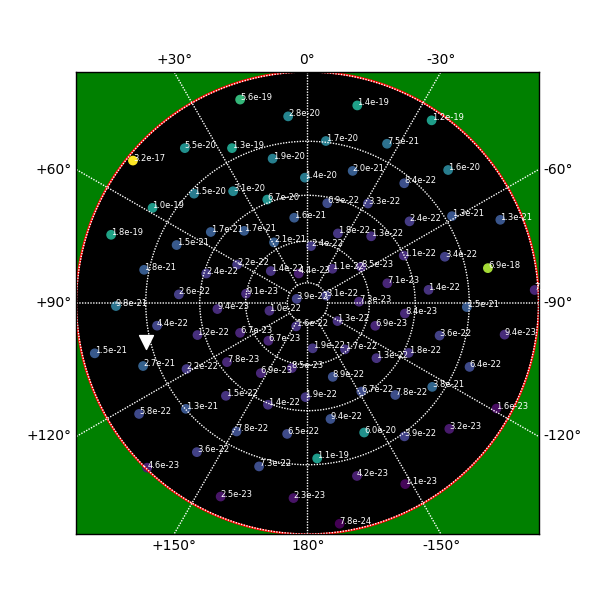

In [23]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
scs=[]
ts=[]
qp=0

In [24]:
if qp:
    for s in scs:s.remove() 
    for t in ts:t.remove() 
    scs=[];ts=[];qp=0

In [25]:
scs+=[m.scatterMap(rays["A"].values,rays["h"].values,c=rays["1/|log10(detJ)|"].values)]
scs+=[m.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')]
for ind in rays.index:
    A=rays.loc[ind]["A"]
    h=rays.loc[ind]["h"]
    detJ=rays.loc[ind]["detJ"]
    ts+=[m.textMap(A,h,f"{detJ:.1e}",fontsize=6,color='w')]
qp=1

In [26]:
fig.savefig(f"figures/{pref}-sky-jacobian.png")

<IPython.core.display.Javascript object>


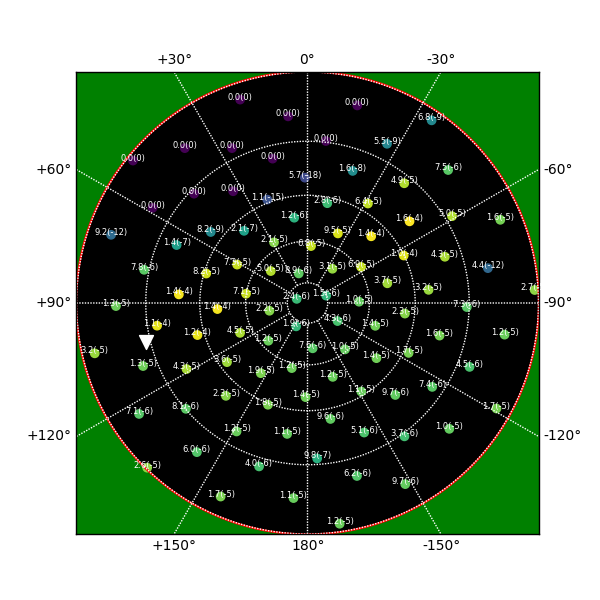

In [27]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
m2=Map("sky")
m2.drawMap(ax)
scs2=[]
ts2=[]
qp2=0

In [28]:
if qp2:
    for s in scs2:s.remove() 
    for t in ts2:t.remove() 
    scs2=[];ts2=[];qp2=0

In [29]:
scs2+=[m2.scatterMap(rays["A"].values,rays["h"].values,c=rays["1/|log10(ph)|"].values)]
scs2+=[m2.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')]
for ind in rays.index:
    A=rays.loc[ind]["A"]
    h=rays.loc[ind]["h"]
    phm,phe=Util.mantisaExp(rays.loc[ind]["ph"])
    ts2+=[m2.textMap(A,h,f"{phm:.1f}({phe})",fontsize=6,color='w',ha='center')]
qp2=1

In [30]:
fig.savefig(f"figures/{pref}-sky-porb.png")

<IPython.core.display.Javascript object>


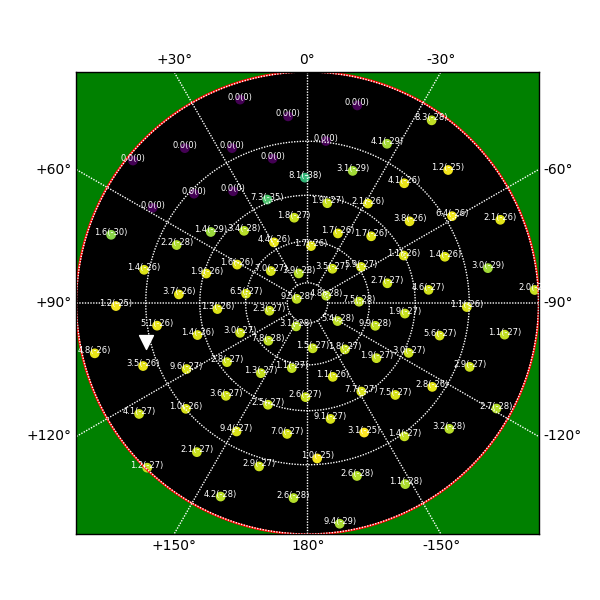

In [31]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()
m3=Map("sky")
m3.drawMap(ax)
scs3=[]
ts3=[]
qp3=0

In [32]:
if qp3:
    for s in scs3:s.remove() 
    for t in ts3:t.remove() 
    scs3=[];ts3=[];qp=0

In [33]:
scs3+=[m3.scatterMap(rays["A"].values,rays["h"].values,c=rays["1/|log10(pi)|"].values,marker='o')]
scs3+=[m3.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')]
for ind in rays.index:
    A=rays.loc[ind]["A"]
    h=rays.loc[ind]["h"]
    pim,pie=Util.mantisaExp(rays.loc[ind]["pi"])
    ts3+=[m3.textMap(A,h,f"{pim:.1f}({pie})",fontsize=6,color='w',ha='center')]
qp3=1

In [34]:
fig.savefig(f"figures/{pref}-sky-pimp.png")

## Contours

In [35]:
m=Map("sky")

In [36]:
nAs=nhs=20
nAs,nhs,As,hs,val=m.makeGrid(nAs,nhs)

In [37]:
detJs=np.zeros_like(val)
phs=np.zeros_like(val)
pis=np.zeros_like(val)
dirs=[]
for i in tqdm(range(nhs)):
    for j in range(nAs):
        h=hs[i,j]
        A=As[i,j]
        if h<0:
            detJ=0
            ph=0
        else:
            for v in [vimp]:
            #for vimp in np.linspace(11.1,43.0,10):
                #ray=GrtRay(location,A*Angle.Deg,h*Angle.Deg,-18.6*Const.km/Const.s)
                ray=GrtRay(location,A*Angle.Deg,h*Angle.Deg,v)
                ray.updateRay(tdb)
                try:
                    ray.propagateRay(tdb)
                    #J = |dEhel/dRimp| = |dchel/dRimp| x |dehel/dchel| x |dEhel/dehel| 
                    detJ=ray.calcJacobianDeterminant()*\
                         (1-ray.terminal.elements[1])*\
                         Jacobians.calcDetMapJacobian(ray.terminal.elements,
                                                      [Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])[0]
                    if ray.terminal.elements[1]<1:
                        ray.terminal.calcUelements(maxvalues=[Const.au,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
                        x=ray.terminal.uelements[:5]
                        ph=mnd.pdf(x)
                    else:
                        ph=0
                except AssertionError as e:
                    detJ=0
                    ph=0
                detJs[i,j]+=np.abs(detJ)
                phs[i,j]+=ph
                pis[i,j]+=ph*np.abs(detJ)


100%|██████████| 20/20 [00:08<00:00,  2.30it/s]


<IPython.core.display.Javascript object>


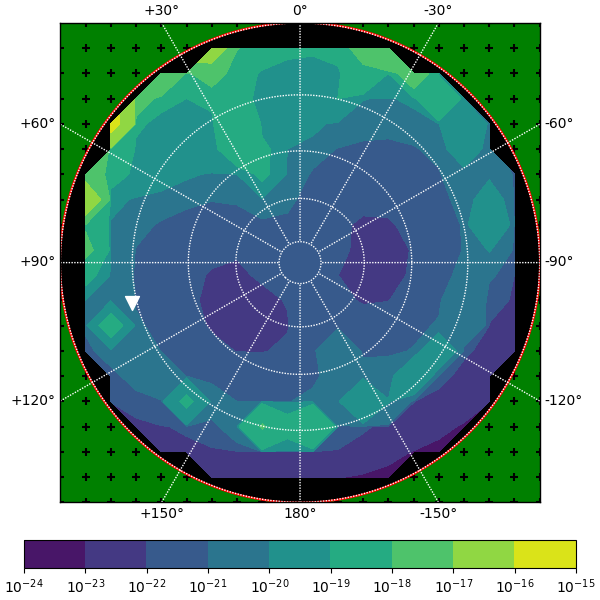

In [38]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
ms=Map("sky")
ms.drawMap(ax)
ms.scatterMap(As,hs,marker='+',color='k')
cont=ms.area.contourf(As,hs,detJs,levels=1000,latlon=True,norm=LogNorm())
cbar=fig.colorbar(cont,drawedges=False,orientation="horizontal")
ms.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')

In [39]:
fig.savefig(f"figures/{pref}-sky-contdetJ.png")

<IPython.core.display.Javascript object>


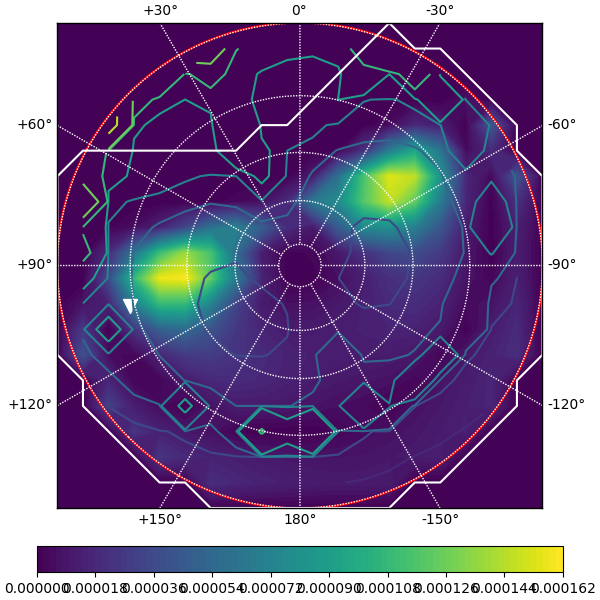

In [40]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
ms=Map("sky")
ms.drawMap(ax)
ms.scatterMap(As,hs,marker='+',color='k')
ms.area.contour(As,hs,detJs,latlon=True,norm=LogNorm())
xs,ys=ms.area(As,hs)
cont=ax.contour(xs,ys,phs,levels=[0],colors=["w"])
cont=ax.contourf(xs,ys,phs,levels=100)
cbar=fig.colorbar(cont,drawedges=False,orientation="horizontal")
ms.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')

In [41]:
fig.savefig(f"figures/{pref}-sky-contpi.png")

<IPython.core.display.Javascript object>


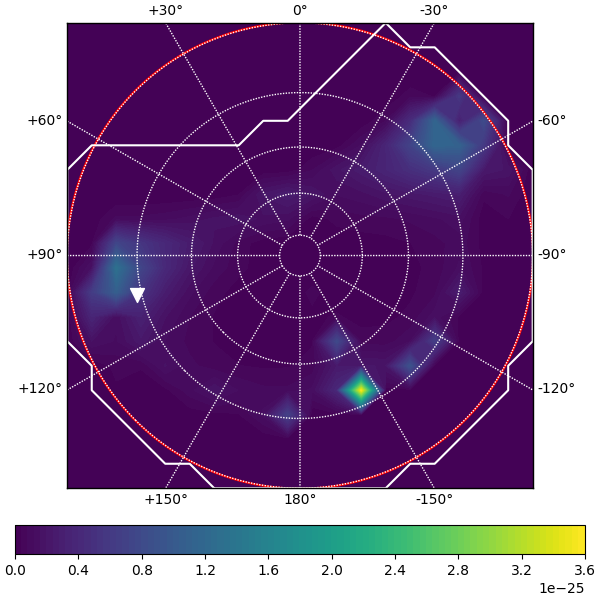

In [42]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
ms=Map("sky")
ms.drawMap(ax)
ms.scatterMap(As,hs,marker='+',color='k')
xs,ys=ms.area(As,hs)
cont=ax.contour(xs,ys,pis,levels=[0],colors=["w"])
cont=ax.contourf(xs,ys,pis,levels=100) #,norm=LogNorm())
cbar=fig.colorbar(cont,drawedges=False,orientation="horizontal")
ms.scatterMap(Aloc*Angle.Rad,hloc*Angle.Rad,color='w',s=100,marker='v')

In [43]:
fig.savefig(f"figures/{pref}-sky-contph.png")

In [44]:
dt=elTime(1)

Elapsed time since last call: 1.33381 min


In [45]:
pis.sum(),pis.max()

(3.525780424347451e-24, 3.560304028433708e-25)

In [46]:
phs.sum(),phs.max()

(0.005563510679986779, 0.00016014050347929596)

## Know case

This is a case to test the theory.  
Let's assume that we have a given distribution of points in the space (x,y,z).  We are intereste on to know the density of points in the (r,q,f) coordinates

In [47]:
#Concentration in the pole
#multin=multinorm([0,0,1],[[1,0,0],[0,1,0],[0,0,1]])
multin=multinorm([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])

In [48]:
def polar2cart(X):
    r,q,f=X
    x=r*np.cos(q)*np.cos(f)
    y=r*np.cos(q)*np.sin(f)
    z=r*np.sin(q)
    return np.array([x,y,z])

def detJ(X):
    r,q,f=X
    detJ=np.abs(r**2*np.cos(q))
    return detJ

def pcart(X):
    global multin
    p=multin.pdf(X)
    return p

In [49]:
def cart2polar(X):
    r,f,q=spy.reclat(X)
    f=2*np.pi+f if f<0 else f
    return r,f*Angle.Rad,q*Angle.Rad

In [50]:
nfs=nqs=20
nfs,nqs,fs,qs,val=m.makeGrid(nfs,nqs)

In [51]:
detJs=np.zeros_like(val)
phs=np.zeros_like(val)
pis=np.zeros_like(val)
for i in tqdm(range(nqs)):
    for j in range(nfs):
        q=qs[i,j]*Angle.Deg
        f=fs[i,j]*Angle.Deg
        x,y,z=polar2cart([1,q,f])
        phs[i,j]=pcart([x,y,z])
        detJs[i,j]=detJ([1,q,f])
        pis[i,j]=detJ([1,q,f])*pcart([x,y,z])

100%|██████████| 20/20 [00:00<00:00, 129.50it/s]


In [52]:
1/np.sqrt((2*np.pi)**3)*np.exp(-0.5)

0.03851083689074894

In [53]:
phs.min()

0.03851083689074893

<IPython.core.display.Javascript object>


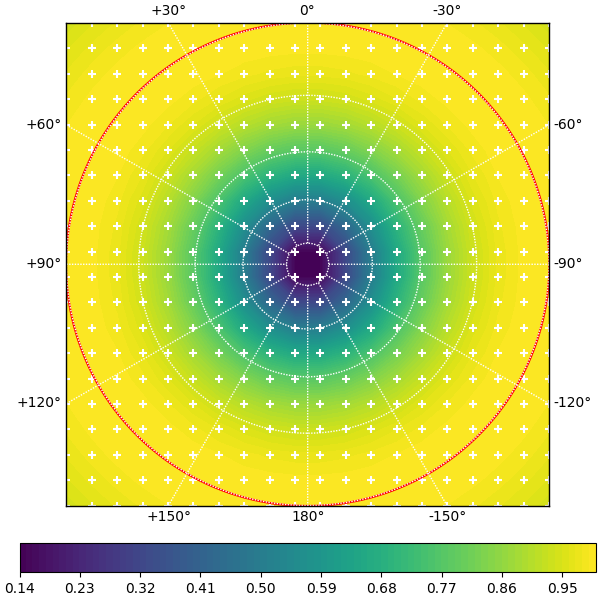

In [54]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
xs,ys=ms.area(fs,qs)
cont=ax.contourf(xs,ys,detJs,levels=100)
m.scatterMap(fs,qs,marker='+',c='w')
fig.colorbar(cont,orientation="Horizontal")

<IPython.core.display.Javascript object>


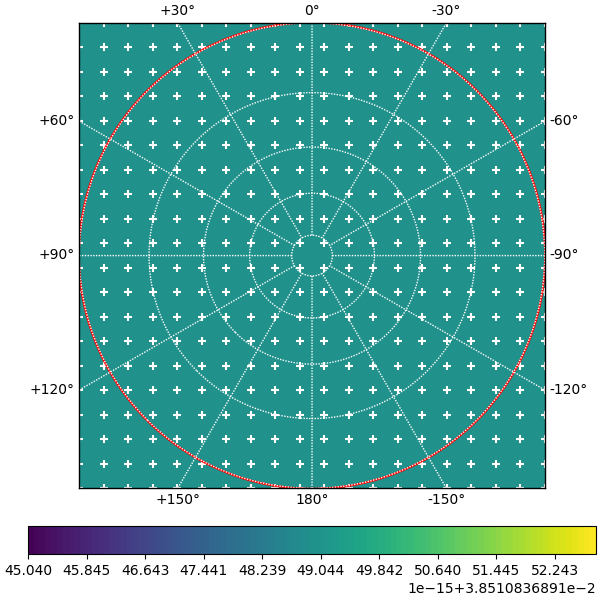

In [55]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
xs,ys=ms.area(fs,qs)
cont=ax.contourf(xs,ys,phs,levels=100)
m.scatterMap(fs,qs,marker='+',c='w')
fig.colorbar(cont,orientation="Horizontal")

<IPython.core.display.Javascript object>


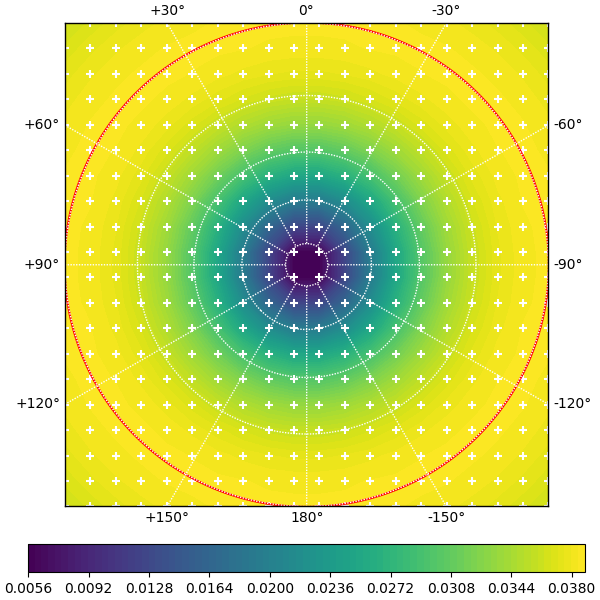

In [56]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
xs,ys=ms.area(fs,qs)
cont=ax.contourf(xs,ys,pis,levels=100)
m.scatterMap(fs,qs,marker='+',c='w')
fig.colorbar(cont,orientation="Horizontal")

In [57]:
#s=multin.rvs(5000000)
s=multin.rvs(50000)

In [58]:
polar=np.zeros_like(s)
for i,X in enumerate(tqdm(s)):
    polar[i,:]=cart2polar(X)

100%|██████████| 50000/50000 [00:02<00:00, 23500.62it/s]


In [59]:
cond=(polar[:,0]>0.95)&(polar[:,0]<1.05)&(s[:,2]>=0)
cond=(polar[:,0]>=0)&(s[:,2]>=0)
cond.sum()
puntos=polar[cond]
print(f"Number of points:",len(puntos))

Number of points: 25035


In [60]:
xs,ys=m.area(puntos[:,1],puntos[:,2])
numxy,xes,yes=np.histogram2d(xs,ys,[15,15])
xms=(xes[1:]+xes[:-1])/2;yms=(yes[1:]+yes[:-1])/2
XMS,YMS=np.meshgrid(xms,yms)

Definitively this is the wrong way to do this:

<IPython.core.display.Javascript object>


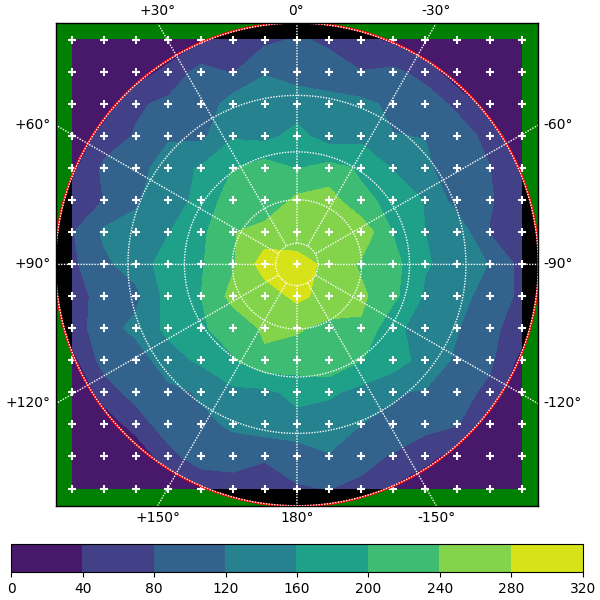

In [61]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
FMS,QMS=m.area(XMS,YMS,inverse=True);cont=m.area.contourf(FMS,QMS,numxy.transpose(),latlon=True)
m.scatterMap(FMS,QMS,marker='+',c='w');
fig.colorbar(cont,orientation="Horizontal")

In [62]:
num,fes,qes=np.histogram2d(puntos[:,1],puntos[:,2],[30,10])
fms=(fes[1:]+fes[:-1])/2;qms=(qes[1:]+qes[:-1])/2
FS,QS=np.meshgrid(fms,qms)
num.shape,FS.shape,QS.shape,num.max()

((30, 10), (10, 30), (10, 30), 147.0)

<IPython.core.display.Javascript object>


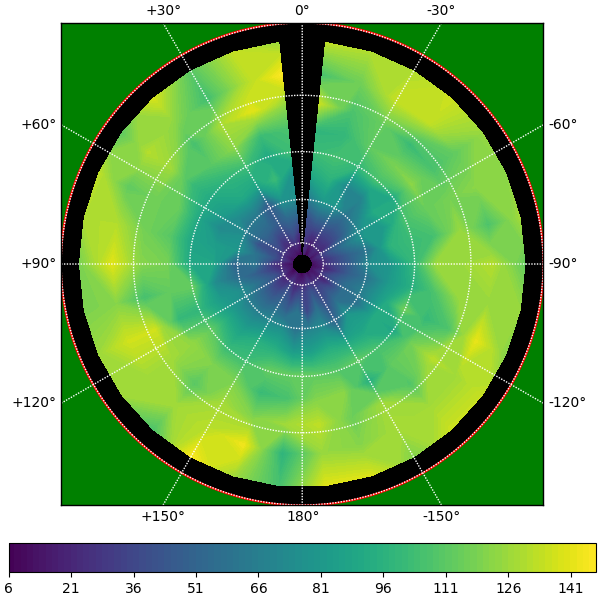

In [63]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()
m=Map("sky")
m.drawMap(ax)
#FMS,QMS=m.area(XMS,YMS,inverse=True);cont=m.area.contourf(FMS,QMS,numxy.transpose(),latlon=True)
#m.scatterMap(FMS,QMS,marker='+',c='w');
#cont=ax.contourf(XMS,YMS,numxy.transpose(),levels=100);ax.scatter(XMS,YMS,marker='+',c='w')
#cont=ax.contourf(XMS,YMS,numxy.transpose(),levels=100);ax.scatter(XMS,YMS,marker='+',c='w')
#cont=ax.pcolor(XS,YS,num.transpose());ax.scatter(XS,YS,marker='+',c='w')
#XS,YS=m.area(FS,QS);cont=ax.contourf(XS,YS,num.transpose(),levels=100);m.scatterMap(FS,QS,marker='+',c='w')
cont=m.area.contourf(FS,QS,num.transpose(),levels=100,latlon=True);
#cont=m.area.contour(FS,QS,num.transpose(),latlon=True);
#m.scatterMap(FS,QS,marker='+',c='r')
fig.colorbar(cont,orientation="Horizontal")

<IPython.core.display.Javascript object>


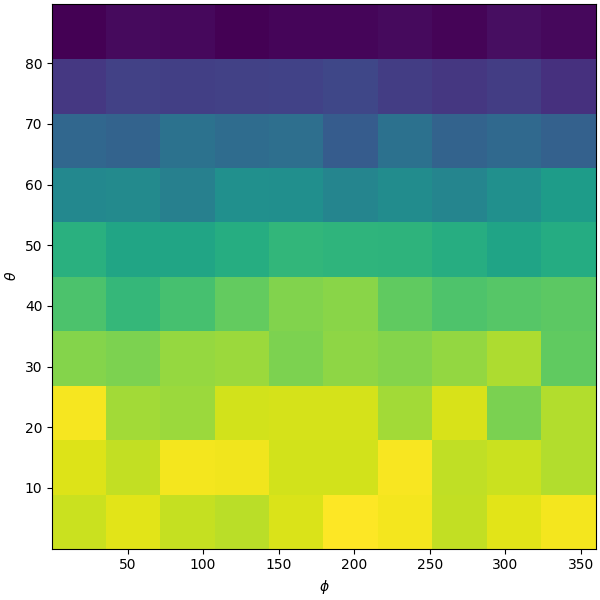

Text(0, 0.5, '$\\theta$')

In [64]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()

fs,qs=puntos[:,1],puntos[:,2]
ax.hist2d(fs,qs,[10,10])

ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\theta$")

### Marginal distributions

<IPython.core.display.Javascript object>


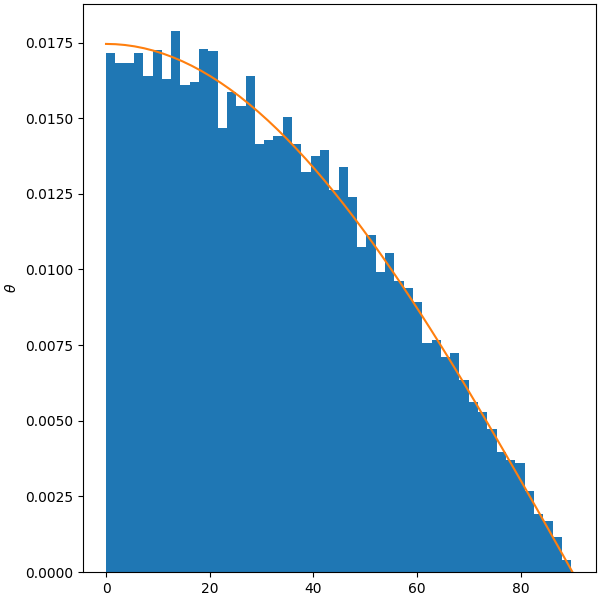

Text(0, 0.5, '$\\theta$')

In [65]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()

fs,qs=puntos[:,1],puntos[:,2]
ax.hist(qs,50,normed=True)

qt=np.linspace(0,90)
ax.plot(qt,np.pi/180*np.cos(qt*Angle.Deg))

ax.set_ylabel(r"$\theta$")

In [66]:
1/np.sqrt((2*np.pi)**3)*np.sqrt(np.pi/2)*2*np.pi

0.49999999999999994

<IPython.core.display.Javascript object>


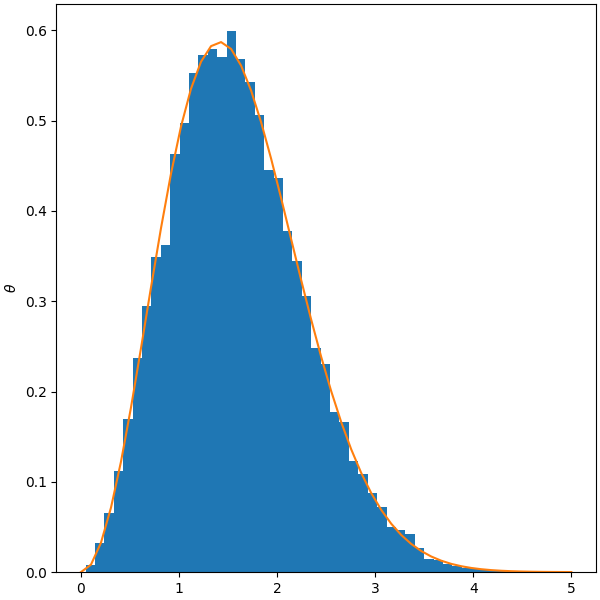

Text(0, 0.5, '$\\theta$')

In [67]:
fig=plt.figure(figsize=(6,6),constrained_layout=True)
ax=fig.gca()

rs,fs,qs=puntos[:,0],puntos[:,1],puntos[:,2]
ax.hist(rs,50,normed=True)

rt=np.linspace(0,5)
ax.plot(rt,1/np.sqrt((2*np.pi)**3)*(2*np.pi)*2*rt**2*np.exp(-rt**2/2))

ax.set_ylabel(r"$\theta$")

In [68]:
import quadpy

In [69]:
def polar2cart(X):
    r,q,f=X
    x=r*np.cos(q)*np.cos(f)
    y=r*np.cos(q)*np.sin(f)
    z=r*np.sin(q)
    return np.array([x,y,z])

def detJ(X):
    r,q,f=X
    detJ=np.abs(r**2*np.cos(q))
    return detJ

def pcart(X):
    global multin
    p=multin.pdf(X.transpose())
    return p

In [186]:
def func(X):
    print(X)
    C=polar2cart(X)
    p=pcart(C)*detJ(X)
    return p

def funcTheo(X):
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)
    return p

In [187]:
X=np.array([1,-75.0*Angle.Deg,35*Angle.Deg])
func(X)

[ 1.         -1.30899694  0.61086524]


0.009967338030162573

In [188]:
X=np.array([[1,1,1],[-75.0*Angle.Deg,-75.0*Angle.Deg,-75.0*Angle.Deg,],[35*Angle.Deg,35*Angle.Deg,35*Angle.Deg]])
func(X),funcTheo(X)

[[ 1.          1.          1.        ]
 [-1.30899694 -1.30899694 -1.30899694]
 [ 0.61086524  0.61086524  0.61086524]]


(array([0.00996734, 0.00996734, 0.00996734]),
 array([0.00996734, 0.00996734, 0.00996734]))

In [189]:
dim=3
lim=1
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
#scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme=quadpy.ncube.phillips(dim) # 3 x 33
scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
scheme.integrate(func,quadpy.ncube.ncube_points([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]))

[[ 1.12701665e-01  1.12701665e-01  1.12701665e-01  5.00000000e-01
   5.00000000e-01  5.00000000e-01  8.87298335e-01  8.87298335e-01
   8.87298335e-01  1.12701665e-01  1.12701665e-01  1.12701665e-01
   5.00000000e-01  5.00000000e-01  5.00000000e-01  8.87298335e-01
   8.87298335e-01  8.87298335e-01  1.12701665e-01  1.12701665e-01
   1.12701665e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
   8.87298335e-01  8.87298335e-01  8.87298335e-01]
 [-1.21673360e+00  0.00000000e+00  1.21673360e+00 -1.21673360e+00
  -2.08166817e-17  1.21673360e+00 -1.21673360e+00  0.00000000e+00
   1.21673360e+00 -1.21673360e+00  0.00000000e+00  1.21673360e+00
  -1.21673360e+00  0.00000000e+00  1.21673360e+00 -1.21673360e+00
   0.00000000e+00  1.21673360e+00 -1.21673360e+00  0.00000000e+00
   1.21673360e+00 -1.21673360e+00  0.00000000e+00  1.21673360e+00
  -1.21673360e+00  0.00000000e+00  1.21673360e+00]
 [ 7.08125448e-01  7.08125448e-01  7.08125448e-01  7.08125448e-01
   7.08125448e-01  7.08125448e-01  7.081

0.19888311556421123

In [335]:
def func(X):
    C=polar2cart(X)
    p=pcart(C)*detJ(X)
    return p

def funcTheo(X):
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)
    return p

dim=3
lim=1
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
#scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme=quadpy.ncube.phillips(dim) # 3 x 33
scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
scheme.integrate(func,quadpy.ncube.ncube_points([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]))

In [336]:
dim=3
lim=1
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
#scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme=quadpy.ncube.phillips(dim) # 3 x 33
scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
scheme.integrate(func,quadpy.ncube.ncube_points([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]))

0.19888311556421123

In [345]:
def funcTheo2(x):
    n=x.shape[1]
    X=np.vstack((np.ones(n)*1,x))
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)
    return p

In [351]:
def funcTheo2_1(X):
    q,f=X
    r=np.ones_like(q)
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)
    return p

In [356]:
dim=2
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme=quadpy.ncube.phillips(dim) # 3 x 33
#scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
scheme.integrate(funcTheo2_1,quadpy.ncube.ncube_points([-np.pi/2,np.pi/2],[0.0,2*np.pi])),\
scheme.integrate(funcTheo2,quadpy.ncube.ncube_points([-np.pi/2,np.pi/2],[0.0,2*np.pi]))

(0.4840015055409087, 0.4840015055409087)

In [74]:
# https://pypi.org/project/quadpy/
import quadpy
import numpy

In [75]:
dim=3
lim=1
scheme=quadpy.ncube.phillips(dim)
scheme.integrate(funcTheo,quadpy.ncube.ncube_points([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]))

0.19872976973478523

### Conclussions:

In this experiment we put a normal distribution of points in cartesian coordinates around a point at (0,0,1).  We simulate GRT by selecting a regular grid of 20x20 directions and throw particles in radial direction up to r=1.  Once reach their final positions, we compute the density of points in the final point: 

$$
p_i(1,q,f) = p_h[x(r,q,f),y(r,q,f),z(r,q,f)] |det J|
$$

In the figures above we show 5 different plots:

1. Contour plots of $|det J| = |r^2 \cos(q)|$, the determinant of the tranformation from spherical to cartesian coordinates.

2. The probability that a point has the observed colatitude ($q$) and longitude ($f$), obtained from the distribution of cartesian coordinates, namely $p_h[x(r,q,f),y(r,q,f),z(r,q,f)]$.  We have assumed $r=1$.  As expected the distribution is gaussian around the pole.

3. The probability of the spherical coordinates p_i(1,q,f) computed with the jacobian: $p_i(1,q,f)$ (see equation above).

In order to verify these results are correct we perform the inverse process (the equivalent to simulate impacts using a forward-integration scheme in GRT).  We generate N points in the cartesian space. Then we propagate all of them towards the origin.  We choose all of them coming from around r=1.  We then obtain their angular procedence in the sky $(q,f)$ and study its distribution.   For that we plot:

4. A 2-d histogram of the sky coordinates, actually a histogram of the coordinates of the projection of those in the plane of the observer. The histogram grid is uniform in the plane of the sky (and it is projected into sky coordinates).

5. A 2-d histogram of the sky coordinates which is actually uniform but in the sky.

What we see is that in the regular sky grid the probability p_i seem to have a hole around the pole.  This hole (that is observed in the GRT plot of $p_i$ and there is due to the Jacobian) is understandable since in coordinates $(q,f)$ the same area $dq df$ is much smaller around the pole than further away from it.  As a result the distribution of $q$ is peaked around 40 degrees.



## Function

In [219]:
def probRdir(Rdir,site=None,tdb=0,population=None,verbose=False):
    """
    Compute the resulting impact probability at a given site and 
    time and with objects coming from a given population.
    
    Parameters:
        
        Rdir: impact vector (azimuth, elevation and speed), numpy array (3), (rad, rad, m/s)
        
    Optional parameters:
        
        site: Location, location object
        population: Population distribution, MultiVariate object.
        
    Return:
        
        pimp: Impact probability, p(R_i) = p(E_h) |det JER|.
    """
    n=Rdir.shape[1]
    p=np.zeros(n)
    for i in range(n):
        A,h,v=Rdir[:,i]
        ray=GrtRay(location,A,h,v)
        ray.updateRay(tdb)
        try:
            ray.propagateRay(tdb)
            ray.terminal.elements[3:]=np.mod(ray.terminal.elements[3:],2*np.pi)
            if verbose:
                ray.terminal.calcUelements([Const.aphelion,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
                locelements=ray.terminal.uelements
                print(f"Impact conditions: np.array([[{A}],[{h}],[{v}]])")
                print(f"Terminal elements:",
                      Util.transformElements(ray.terminal.elements,[1/Const.au,Angle.Rad]))
                print("Unbound terminal elements:",locelements)

            #Check if orbit is bound
            if ray.terminal.elements[1]<1:
                #J = |dEhel/dRimp| = |dchel/dRimp| x |dehel/dchel| x |dEhel/dehel| 
                detJ=ray.calcJacobianDeterminant()*\
                     (1-ray.terminal.elements[1])*\
                     Jacobians.calcDetMapJacobian(ray.terminal.elements,
                                                  [Const.aphelion,1,np.pi,2*np.pi,2*np.pi,2*np.pi])[0]
                ray.terminal.calcUelements(maxvalues=[Const.aphelion,1,np.pi,2*np.pi,2*np.pi,2*np.pi])
                x=ray.terminal.uelements[:5]
                ph=population.pdf(x)
            #If orbit is not bound probability is null
            else:
                ph=0
                detJ=0
        except AssertionError as e:
            detJ=0
            ph=0
        del ray
        p[i]=ph*np.abs(detJ)
    return p

In [289]:
#Site 
lon=59.8703**Angle.Deg #rad
lat=55.0958*Angle.Deg #rad
alt=23.3*Const.km #m
location=Location(earth,lon,lat,alt)

#Time
datestring="02/15/2013 03:20:34"
fmt="%m/%d/%Y %H:%M:%S"
t=Spice.str2tdb(datestring)

#Population
weights=[0.6]
locs=[
    [0.5,0.5,-2.0],
    [2.0,0.3,-2.6]
]
scales=[
    [1.3,0.7,0.5],
    [0.4,0.9,1.6]
]
angles=[
    [-40.0*Angle.Deg,-86.0*Angle.Deg,0.0*Angle.Deg],
    [+80.0*Angle.Deg,-109.0*Angle.Deg,0.0*Angle.Deg]
]
ranges=[
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)],
    [Util.fin2Inf(1e-2,360.0),Util.fin2Inf(360.0-1e-2,360.0)]
]
NEOs=MultiVariate([1,1,1,0,0])
NEOs.setUnflatten(weights,locs,scales,angles,ranges)

#Direction
#"""
Aloc=103.5*Angle.Deg
hloc=18.55*Angle.Deg
vimp=-18.6*Const.km/Const.s
#"""
"""
Aloc=270.*Angle.Deg
hloc=20.*Angle.Deg
vimp=-18.6*Const.km/Const.s
#"""

Rdir=np.array([[Aloc],[hloc],[vimp]])

#Input conditions
print(f"Impact conditions:")
print(f"\tDate: {datestring}")
print(f"\tlon. {lon*Angle.Rad:.4g}, lat. {lat*Angle.Rad:.4g}, alt. {alt/Const.km:.4g} km")
print(f"\tAloc = {Aloc*Angle.Rad:.4g}, hloc = {lat*Angle.Rad:.4g}, vimp = {vimp/Const.km} km/s")

Impact conditions:
	Date: 02/15/2013 03:20:34
	lon. 61.54, lat. 55.1, alt. 23.3 km
	Aloc = 103.5, hloc = 55.1, vimp = -18.6 km/s


In [262]:
probRdir(Rdir,site=location,tdb=t,population=NEOs,verbose=True)

Impact conditions: np.array([[1.806415775814131],[0.32375857624494814],[-18600.0]])
Terminal elements: [  0.72231578   0.5297087    5.18079402 326.57568287 103.0150748
  24.56944643]
Unbound terminal elements: [ 0.89757661  0.11897496 -3.518794    2.27937803 -0.91414209 -2.61391129]


array([5.22857227e-26])

In [222]:
%timeit -n 100 probRdir(Rdir,site=location,tdb=t,population=NEOs,verbose=False)

100 loops, best of 3: 28.6 ms per loop


In [155]:
from cycler import cycler

In [171]:
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))
ddefault_cycler = (cycler(color=['r']*4) +
                  cycler(linestyle=['-', '--', ':', '-.']))
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) *
                  cycler(linestyle=['-', '--', ':', '-.']))


<IPython.core.display.Javascript object>


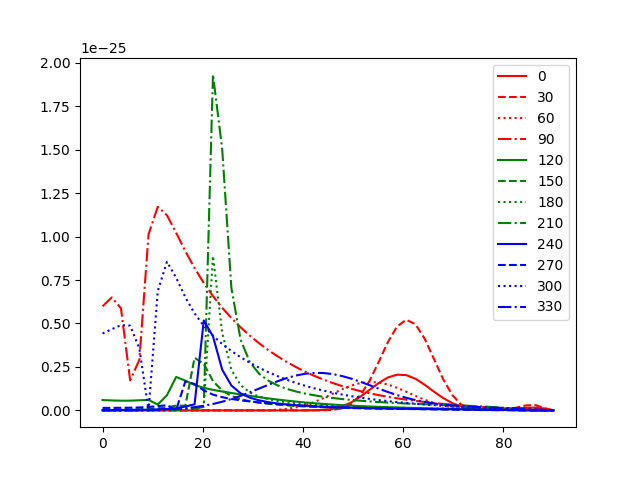

Elapsed time since last call: 17.7545 s


In [301]:
fig=plt.figure()
ax=fig.gca()
ax.set_prop_cycle(default_cycler)

elTime(0)
#for Aloc in np.array([0.0,90.0,180.0,270.0])*Angle.Deg:
for Aloc in np.arange(0.0,360.0,30.0)*Angle.Deg:
    hs=np.linspace(0.0,90.0,50.0)*Angle.Deg
    As=np.ones_like(hs)*Aloc
    vs=np.ones_like(hs)*vimp
    Rdir=np.vstack((As,hs,vs))
    ps=probRdir(Rdir,site=location,tdb=t,population=NEOs,verbose=False) 
    ax.plot(hs*Angle.Rad,ps,label=f"{Aloc*Angle.Rad:.3g}")
elTime(1)
ax.legend(loc='best')

In [371]:
def integrand(X,verbose=False):
    if verbose:
        print(X)
    p=probRdir(X,site=location,tdb=t,population=NEOs,verbose=False) 
    return p
    
#integrand=lambda X:probRdir(X,site=location,tdb=t,population=NEOs,verbose=False) 

In [1488]:
dim=3
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme = quadpy.ncube.phillips(dim) # 3 x 33
#scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
dt=elTime(0)
psite=scheme.integrate(integrand,quadpy.ncube.ncube_points([0.0,2*np.pi],[0,np.pi/2],
                                                     [-72.2*Const.km/Const.s,-11.1*Const.km/Const.s],
                                                     ))
dt=elTime(1)
print(f"Site probability: {psite}")

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Elapsed time since last call: 529.842 ms
Site probability: 1.6894810998515917e-21


In [1489]:
vimps=-np.linspace(11.1,18.0,30)*Const.km/Const.s
dvimp=(vimps[1]-vimps[0])

In [1490]:
ps=np.zeros_like(vimps)
for i,vimp in enumerate(tqdm(vimps)):
    vimp=-18.6*Const.km/Const.s
    dim=3
    #scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
    #scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
    scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
    #scheme = quadpy.ncube.phillips(dim) # 3 x 33
    #scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
    psite=scheme.integrate(integrand,quadpy.ncube.ncube_points([0.0,2*np.pi],[0,np.pi/2],
                                                             [vimp+dvimp,vimp],
                                                             ))
    print(psite)
    break
    ps[i]=psite

  0%|          | 0/30 [00:00<?, ?it/s]

1.5676675244797095e-23


<IPython.core.display.Javascript object>


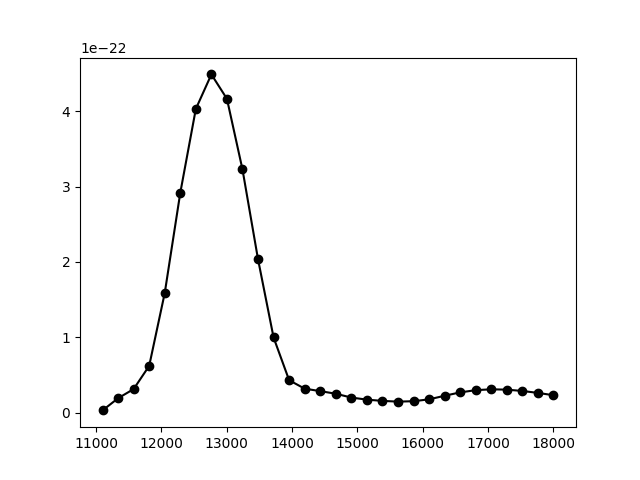

In [403]:
fig=plt.figure()
ax=fig.gca()
ax.plot(-vimps,ps,'ko-')

<IPython.core.display.Javascript object>


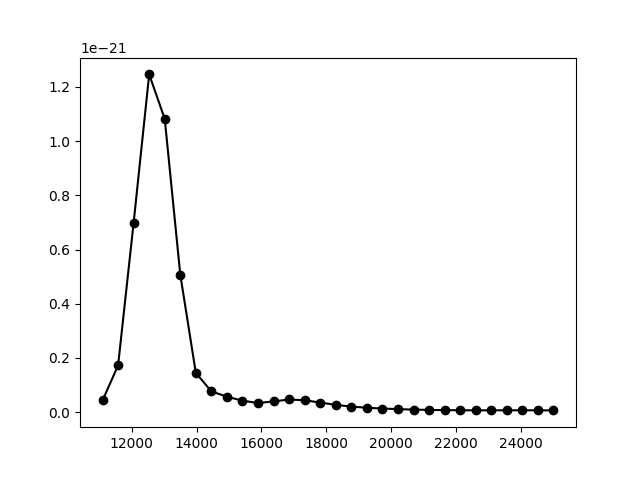

In [398]:
fig=plt.figure()
ax=fig.gca()
ax.plot(-vimps,ps,'ko-')

<IPython.core.display.Javascript object>


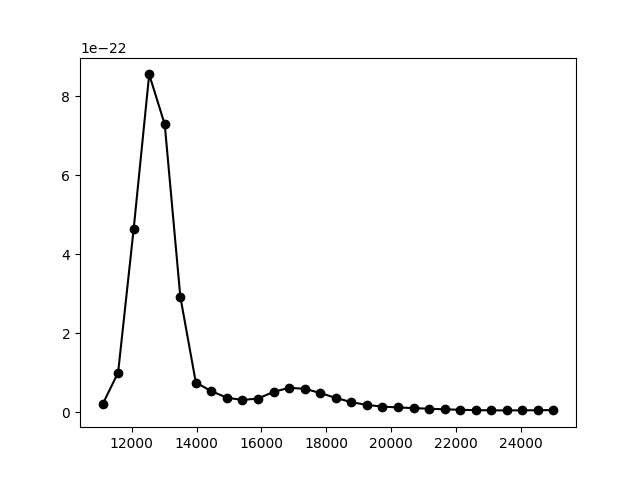

In [396]:
fig=plt.figure()
ax=fig.gca()
ax.plot(-vimps,ps,'ko-')

In [288]:
%timeit -n 10 scheme.integrate(integrand,quadpy.ncube.ncube_points([0.0+eps,2*np.pi-eps],[0+eps,np.pi/2-eps],[-43.3*Const.km/Const.s,-11.1*Const.km/Const.s]))

10 loops, best of 3: 713 ms per loop


In [1491]:
vimp=-18.6*Const.km/Const.s
def integrand2d(x,verbose=False):
    n=x.shape[1]
    X=np.vstack((x,vimp*np.ones(n)))
    p=probRdir(X,site=location,tdb=t,population=NEOs,verbose=False) 
    return p

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1492]:
dim=2
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
#scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme = quadpy.ncube.phillips(dim) # 3 x 33
#scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
dt=elTime(0)
psite=scheme.integrate(integrand2d,quadpy.ncube.ncube_points([0.0,2*np.pi],[0,np.pi/2]))
dt=elTime(1)
print(f"Site probability: {psite}")

Elapsed time since last call: 365.216 ms
Site probability: 7.180606720104161e-26


In [430]:
vimps=-np.linspace(11.1,18.0,30)*Const.km/Const.s
ps=np.zeros_like(vimps)
for i,vimp in enumerate(tqdm(vimps)):
    #vimp=-18.6*Const.km/Const.s
    def f(x,verbose=False):
        n=x.shape[1]
        X=np.vstack((x,vimp*np.ones(n)))
        p=probRdir(X,site=location,tdb=t,population=NEOs,verbose=False) 
        return p
    dim=2
    #scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
    #scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
    #scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
    scheme = quadpy.ncube.phillips(dim) # 3 x 33
    #scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
    psite=scheme.integrate(f,quadpy.ncube.ncube_points([0.0,2*np.pi],[0,np.pi/2]))
    ps[i]=psite

100%|██████████| 30/30 [00:11<00:00,  2.49it/s]


<IPython.core.display.Javascript object>


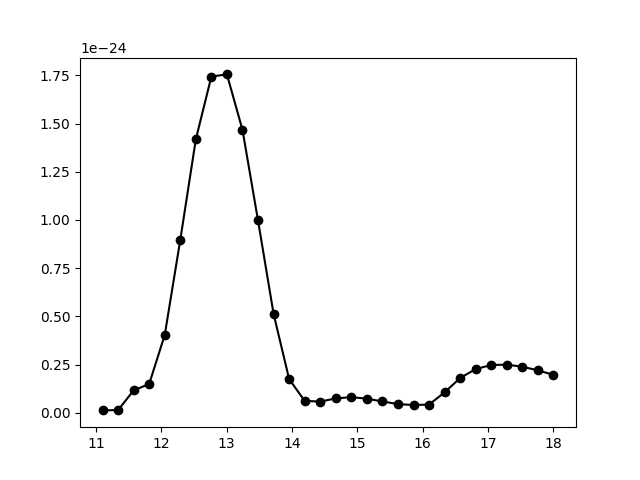

In [431]:
fig=plt.figure()
ax=fig.gca()
ax.plot(-vimps/(Const.km/Const.s),ps,'ko-')

<IPython.core.display.Javascript object>


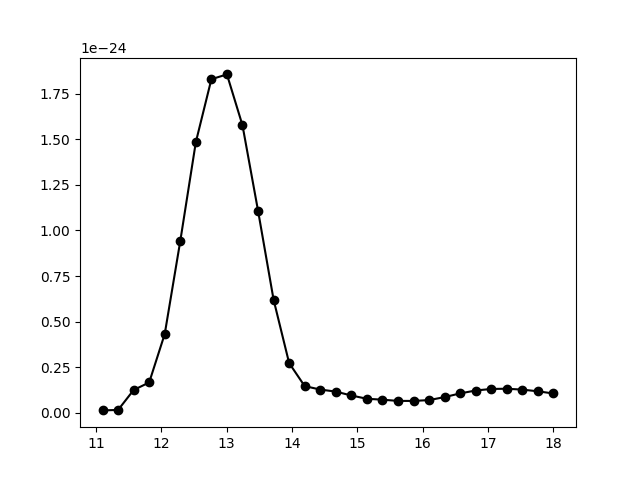

In [429]:
fig=plt.figure()
ax=fig.gca()
ax.plot(-vimps/(Const.km/Const.s),ps,'ko-')

<IPython.core.display.Javascript object>


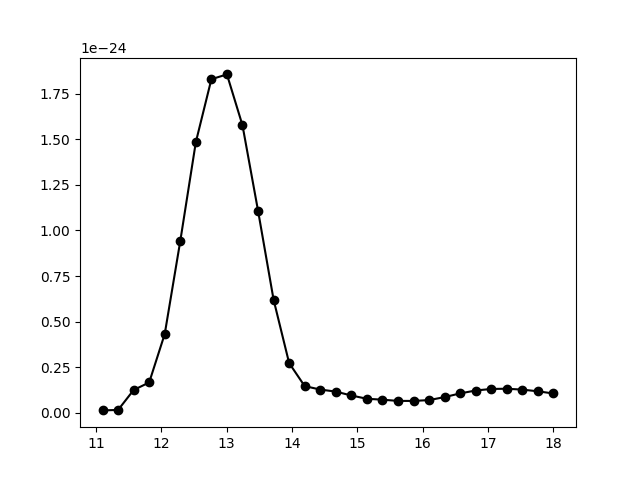

In [425]:
fig=plt.figure()
ax=fig.gca()
ax.plot(-vimps/(Const.km/Const.s),ps,'ko-')

In [306]:
a=np.array([1,2,3])

In [309]:
np.append(a,[4])

array([1, 2, 3, 4])

In [320]:
M=[[1,1,1],[2,2,2]]

In [323]:
np.vstack((M,[3,3,3]))

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

## Multiple integrals

In [434]:
def func(X):
    C=polar2cart(X)
    p=pcart(C)*detJ(X)
    return p

def funcTheo(X):
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)
    return p

In [435]:
dim=3
lim=1
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
#scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme=quadpy.ncube.phillips(dim) # 3 x 33
scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
scheme.integrate(func,quadpy.ncube.ncube_points([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]))

0.19888311556421123

In [743]:
from quadpy import ncube as quad
class MultiIntegral(object):
    
    _schemes = [
    "dobrodeev_1970",
    "dobrodeev_1978",
    "ewing",
    "hammer_stroud_1n",
    "hammer_stroud_2n",
    "mustard_lyness_blatt",
    "phillips",
    "stroud_1957_2",
    "stroud_1957_3",
    "stroud_1966_a",
    "stroud_1966_b",
    "stroud_1966_c",
    "stroud_1966_d",
    "stroud_1968",
    "stroud_cn_1_1",
    "stroud_cn_1_2",
    "stroud_cn_2_1",
    "stroud_cn_2_2",
    "stroud_cn_3_1",
    "stroud_cn_3_2",
    "stroud_cn_3_3",
    "stroud_cn_3_4",
    "stroud_cn_3_5",
    "stroud_cn_3_6",
    "stroud_cn_5_2",
    "stroud_cn_5_3",
    "stroud_cn_5_4",
    "stroud_cn_5_5",
    "stroud_cn_5_6",
    "stroud_cn_5_7",
    "stroud_cn_5_8",
    "stroud_cn_5_9",
    "stroud_cn_7_1",
    "thacher",
    "tyler"]
    
    def __init__(self,multifunc,variables,nscheme="dobrodeev_1978"):
        self.multifunc=multifunc
        self.variables={var:i for i,var in enumerate(variables)}
        self.dim=len(variables)
        self.nscheme=nscheme
        self.setScheme(nscheme)
        
    def setScheme(self,nscheme):
        if nscheme not in self._schemes:
            raise AssertionError(f"Scheme not recognized.")
        self.nscheme=nscheme
        self.scheme=quad.__dict__[nscheme](self.dim)

    def integrate(self,variables,args=()):
        iconst=[]
        values=[]
        ivars=[]
        intervals=()
        svars=list(variables.keys())
        list.sort(svars,key=lambda s:self.variables[s])
        for v in svars:
            val=variables[v]
            if len(val)==1:
                iconst+=[self.variables[v]]
                values+=val
            else:
                ivars+=[self.variables[v]]
                intervals+=(val,)
        sdim=len(ivars)
        scheme=quad.__dict__[self.nscheme](sdim)
        def f(x):
            M=x.shape[1]
            self.M=M
            X=np.zeros((self.dim,M))
            X[ivars,:]=x
            X[iconst,:]=np.array(list(values)*M).reshape(M,len(iconst)).transpose()
            p=self.multifunc(X,*args)
            return p
        i=scheme.integrate(f,quad.ncube_points(*intervals))
        return i

In [724]:
nint=MultiIntegral(func,["r","q","f"])
for scheme in MultiIntegral._schemes:
    try:
        nint.setScheme(scheme)
        i=nint.integrate({"r":[0.0,1.0],"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(1.0,));it=0.198748
        #i=nint.integrate({"r":[1.0],"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(1.0,));it=0.483941
        #i=nint.integrate({"r":[1.0],"q":[np.pi/3],"f":[0.0,2*np.pi]},args=(1.0,));it=0.120985
        print(f"Integral (true = {it}) using scheme '{scheme}' (using stencil {nint.M}): {i:g} (error = {np.abs(i-it)/it*100:.2f}%)")
    except:
        print(f"No marginal integral available for {scheme}")

No marginal integral available for dobrodeev_1970
Integral (true = 0.198748) using scheme 'dobrodeev_1978' (using stencil 32): 0.198861 (error = 0.06%)
Integral (true = 0.198748) using scheme 'ewing' (using stencil 9): 0.184341 (error = 7.25%)
Integral (true = 0.198748) using scheme 'hammer_stroud_1n' (using stencil 6): 0.218866 (error = 10.12%)
Integral (true = 0.198748) using scheme 'hammer_stroud_2n' (using stencil 19): 0.198883 (error = 0.07%)
Integral (true = 0.198748) using scheme 'mustard_lyness_blatt' (using stencil 15): 0.200188 (error = 0.72%)
Integral (true = 0.198748) using scheme 'phillips' (using stencil 33): 0.19873 (error = 0.01%)
Integral (true = 0.198748) using scheme 'stroud_1957_2' (using stencil 7): 0.154702 (error = 22.16%)
Integral (true = 0.198748) using scheme 'stroud_1957_3' (using stencil 6): 0.203145 (error = 2.21%)
Integral (true = 0.198748) using scheme 'stroud_1966_a' (using stencil 14): 0.19879 (error = 0.02%)
Integral (true = 0.198748) using scheme 'str

In [765]:
from quadpy import hexahedron as quad,line_segment as lschema
class MultiIntegral(object):
    
    _schema = [
    "chebyshev_gauss_1",
    "chebyshev_gauss_2",
    "clenshaw_curtis",
    "fejer_1",
    "fejer_2",
    "gauss_jacobi",
    "gauss_kronrod",
    "gauss_legendre",
    "gauss_lobatto",
    "gauss_patterson",
    "gauss_radau",
    "midpoint",
    "newton_cotes_open",
    "newton_cotes_closed",
    "trapezoidal",
    "tanh_sinh",
    "tanh_sinh_lr",
    "integrate_adaptive"]
    
    def __init__(self,multifunc,variables,nscheme="newton_cotes_closed"):
        self.multifunc=multifunc
        self.variables={var:i for i,var in enumerate(variables)}
        self.dim=len(variables)
        self.nscheme=nscheme
        self.setScheme(nscheme)
        
    def setScheme(self,nscheme):
        if nscheme not in self._schema:
            raise AssertionError(f"Scheme not recognized.")
        self.nscheme=nscheme
        self.scheme=quad.product(lschema.__dict__[self.nscheme](self.dim))

    def integrate(self,variables,args=()):
        iconst=[]
        values=[]
        ivars=[]
        intervals=()
        svars=list(variables.keys())
        list.sort(svars,key=lambda s:self.variables[s])
        for v in svars:
            val=variables[v]
            if len(val)==1:
                iconst+=[self.variables[v]]
                values+=val
            else:
                ivars+=[self.variables[v]]
                intervals+=(val,)
        sdim=len(ivars)
        scheme=quad.product(lschema.__dict__[self.nscheme](sdim))
        def f(x):
            M=x.shape[1]
            self.M=M
            X=np.zeros((self.dim,M))
            X[ivars,:]=x
            X[iconst,:]=np.array(list(values)*M).reshape(M,len(iconst)).transpose()
            p=self.multifunc(X,*args)
            return p
        
        i=scheme.integrate(f,quad.cube_points(*intervals))
        return i

In [766]:
def func(X,factor=1):
    r,q,f=X
    p=factor*1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

In [768]:
nint=MultiIntegral(func,["r","q","f"])
for scheme in MultiIntegral._schema:
    try:
        nint.setScheme(scheme)
        i=nint.integrate({"r":[0.0,1.0],"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(1.0,));it=0.099374
        #i=nint.integrate({"r":[1.0],"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(1.0,));it=0.483941
        #i=nint.integrate({"r":[1.0],"q":[np.pi/3],"f":[0.0,2*np.pi]},args=(1.0,));it=0.120985
        print(f"Integral (true = {it}) using scheme '{scheme}' (using stencil {nint.M}): {i:g} (error = {np.abs(i-it)/it*100:.2f}%)")
    except:
        print(f"No marginal integral available for {scheme}")
    

Integral (true = 0.099374) using scheme 'chebyshev_gauss_1' (using stencil 27): 0.536169 (error = 439.55%)
Integral (true = 0.099374) using scheme 'chebyshev_gauss_2' (using stencil 27): 0.0725521 (error = 26.99%)
Integral (true = 0.099374) using scheme 'clenshaw_curtis' (using stencil 27): 0.207358 (error = 108.66%)
Integral (true = 0.099374) using scheme 'fejer_1' (using stencil 27): 0.187143 (error = 88.32%)
Integral (true = 0.099374) using scheme 'fejer_2' (using stencil 27): 0.113651 (error = 14.37%)
No marginal integral available for gauss_jacobi
Integral (true = 0.099374) using scheme 'gauss_kronrod' (using stencil 343): 0.0994349 (error = 0.06%)
Integral (true = 0.099374) using scheme 'gauss_legendre' (using stencil 27): 0.152142 (error = 53.10%)
Integral (true = 0.099374) using scheme 'gauss_lobatto' (using stencil 27): 0.207358 (error = 108.66%)
Integral (true = 0.099374) using scheme 'gauss_patterson' (using stencil 3375): 0.099374 (error = 0.00%)
Integral (true = 0.099374) 

In [771]:
import quadpy
scheme = quadpy.e3r2.stroud_secrest_10a
val = scheme.integrate(lambda x: x[0]**2)

AttributeError: 'function' object has no attribute 'integrate'

In [761]:
def func(X):
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

def func2(X):
    q,f=X
    r=1
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

In [763]:
scheme=quadpy.ncube.product(quadpy.line_segment.newton_cotes_closed(2))
val=scheme.integrate(func,quadpy.ncube.ncube_points([-np.pi/2,np.pi/2],[0.0,2*np.pi]))
val

AttributeError: module 'quadpy.ncube' has no attribute 'product'

In [773]:
from scipy import integrate

In [807]:
def func(*X):
    r,q,f=X[:3]
    factor=X[-1]
    p=factor/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

In [829]:
integrate.nquad(func,[[0.0,1.0],[-np.pi/2,np.pi/2],[0.0,2*np.pi]],
                opts=dict(limit=7,maxp1=3),
                args=(1.0,),full_output=True)

(0.0993740215493996, 7.293895727340454e-11, {'neval': 9261})

In [849]:
def f(x):
    print(len(x))
    return x**2

In [851]:
print(integrate.fixed_quad(f,0.0,1.0,n=21))
NCALLS

21
(0.3333333333333332, None)


1

In [1082]:
NCALLS=0
def func(*X):
    global NCALLS
    r,q,f=X
    #try:
    #    print(len(r)*len(q)*len(f))
    #except:pass
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q) #*np.cos(f)**2
    NCALLS+=1
    return p

In [1083]:
integrate.tplquad(func,0,1,lambda x:-np.pi/2,lambda y:np.pi/2,lambda x,y:0,lambda x,y:2*np.pi)

(0.15915494090453178, 1.0000318034023425e-08)

In [1084]:
NCALLS

26019

In [1101]:
from functools import partial
class Integration(object):
    def __init__(self,func,ranges,opts):
        self.abserr = 0
        self.func = func
        self.ranges = ranges
        self.opts = opts
        self.maxdepth = len(ranges)

    def integrate(self,*args,**kwargs):
        depth = kwargs.pop('depth', 0)
        
        ind = -(depth + 1)
        low, high = self.ranges[ind]
        opt = self.opts[ind]

        if depth + 1 == self.maxdepth:
            f = self.func
        else:
            f = partial(self.integrate,depth=depth+1)
            
        quad_r = integrate.quad(f,low,high,args=args,**opt)
        #quad_r = integrate.fixed_quad(f,low,high,args=args,**opt)
        #quad_r = integrate.quadrature(f,low,high,args=args,**opt)
        value = quad_r[0]

        return value

In [1102]:
#mint=Integration(func,[[0.0,1.0],[-np.pi/2,np.pi/2],[0.0,2*np.pi]],opts=[dict(n=9)]*3)
mint=Integration(func,[[0.0,1.0],[-np.pi/2,np.pi/2],[0.0,2*np.pi]],opts=[dict()]*3)

In [1103]:
mint.integrate(args=(3,)),NCALLS

NameError: name 'factor' is not defined

In [1077]:
NCALLS

9262

In [1465]:
from scipy import integrate
from functools import partial

class _NQuad(object):
    
    def __init__(self,func,ranges,integrator=integrate.fixed_quad,opts=None):
        self.abserr = 0
        self.func = func
        self.ranges = ranges
        self.maxdepth = len(ranges)
        if opts is None:
            self.opts=[dict()]*self.maxdepth
        else:
            self.opts = opts
        self.integrator=integrator

    def integrate(self,*args,**kwargs):
        depth = kwargs.pop('depth', 0)
        
        ind = -(depth + 1)
        low, high = self.ranges[ind]
        opt = self.opts[ind]

        if depth + 1 == self.maxdepth:
            f = self.func
        else:
            f = partial(self.integrate,depth=depth+1)
            
        quad_r = self.integrator(f,low,high,args=args,**opt)

        try:
            value = quad_r[0]
            abserr = quad_r[1]
        except:
            value = quad_r
            abserr = None
        
        if abserr is None:
            self.abserr = None
        else:
            self.abserr = max(self.abserr, abserr)
                    
        if depth>0:
            return value
        else:
            return value,self.abserr
            
class MultiQuad(object):
    
    _integrators=[
        "fixed_quad",
        "quad",
        "romberg"
    ]

    def __init__(self,multifunc,variables,integrator="fixed_quad",opt=dict()):
        self.multifunc=multifunc
        self.variables={var:i for i,var in enumerate(variables)}
        self.dim=len(variables)
        self.opt=opt
        self.setIntegrator(integrator)
        self.fun_calls=0
        
    def setIntegrator(self,nintegrator):
        self.nintegrator=nintegrator
        if self.nintegrator in self._integrators:
            self.integrator=integrate.__dict__[self.nintegrator]
        else:
            raise AssertionError(f"Integrator {nintegrator} not recognized")

    def integrate(self,variables,args=()):
        
        iconst=[]
        values=[]
        ivars=[]
        intervals=[]
        svars=list(variables.keys())
        list.sort(svars,key=lambda s:self.variables[s])
        for v in svars:
            val=variables[v]
            if len(val)==1:
                iconst+=[self.variables[v]]
                values+=val
            else:
                ivars+=[self.variables[v]]
                intervals+=[val]
        sdim=len(ivars)
        opts=[self.opt]*sdim

        if self.nintegrator in ["fixed_quad"]:
            def f(*x):
                M=len(x[0])
                self.M=M
                self.fun_calls+=M
                X=np.zeros((self.dim,M))
                X[ivars,:]=np.vstack(x)
                X[iconst,:]=np.array(list(values)*M).reshape(M,len(iconst)).transpose()
                p=self.multifunc(X,*args)
                return p
        else:
            def f(*x):
                self.M=1
                self.fun_calls+=1
                X=np.zeros((self.dim,1))
                X[ivars,:]=np.array([x]).transpose()
                X[iconst,:]=np.array(list(values)*self.M).reshape(self.M,len(iconst)).transpose()
                p=self.multifunc(X,*args)
                return p
            
        pint=_NQuad(f,intervals,integrator=self.integrator,opts=opts)
        i=pint.integrate()
        return i

In [1487]:
#nint=MultiQuad(func,["r","q","f"],opt=dict(n=7))
#nint=MultiQuad(func,["r","q","f"],integrator="quad") #,opt=dict(full_output=True))
nint=MultiQuad(func,["r","q","f"],integrator="fixed_quad")
#nint=MultiQuad(func,["r","q","f"],integrator="romberg")
elTime(0)
i=nint.integrate({"r":[1.0],"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(1.0,))
elTime(1)
print(i,nint.fun_calls)

Elapsed time since last call: 550.032 us
(0.24394876040606925, None) 5


In [1485]:
#integrate.nquad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],full_output=True)
elTime(0)
i=integrate.nquad(func_full,[[0.0,1.0],[-np.pi/2,np.pi/2],[0.0,2*np.pi]],full_output=True)
dt=elTime(1)
print(i)

Elapsed time since last call: 178.477 ms
(0.0993740215493996, 7.293895727340454e-11, {'neval': 9261})


In [1471]:
#pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],opts=[dict(n=7)]*2)
#pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],integrator=integrate.romberg)
#pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],integrator=integrate.romberg)
#pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],integrator=integrate.fixed_quad)
pint=_NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],integrator=integrate.quad)
pint.integrate()

(0.2419707245191433, 1.7760268226803324e-10)

In [1486]:
def func(X,*args):
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

In [1432]:
def func_nquad(*X):
    q,f=X
    r=1.0
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

In [1440]:
def func_full(*X):
    r,q,f=X
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q)*np.cos(f)**2
    return p

In [1392]:
integrate.nquad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],full_output=True)

(0.2419707245191433, 1.7760268226803324e-10, {'neval': 441})

In [1393]:
#pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],opts=[dict(n=7)]*2)
#pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],integrator=integrate.romberg)
pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],integrator=integrate.fixed_quad)
pint.integrate()

KeyError: -1

In [1349]:
nint=MultiQuad(func,["r","q","f"],opt=dict(n=7))
i=nint.integrate({"r":[1.0],"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(1.0,));it=0.099374
print(i)

(0.2260953184694862, None)


In [1337]:
nint._ncalls

7

In [1201]:
from functools import partial
class Integration(object):
    def __init__(self,func,ranges,opts):
        self.abserr = 0
        self.func = func
        self.ranges = ranges
        self.opts = opts
        self.maxdepth = len(ranges)

    def integrate(self,*args,**kwargs):
        depth = kwargs.pop('depth', 0)
        
        ind = -(depth + 1)
        low, high = self.ranges[ind]
        opt = self.opts[ind]

        if depth + 1 == self.maxdepth:
            f = self.func
        else:
            f = partial(self.integrate,depth=depth+1)
            
        #quad_r = integrate.quad(f,low,high,args=args,**opt)
        quad_r = integrate.fixed_quad(f,low,high,args=args,**opt)
        #quad_r = integrate.quadrature(f,low,high,args=args,**opt)
        value = quad_r[0]

        return value

In [1241]:
def func_nquad(*X):
    q,f=X
    r=1*np.ones_like(q)
    p=1/np.sqrt((2*np.pi)**3)*np.exp(-r**2/2)*r**2*np.cos(q) #*np.cos(f)**2
    return p

In [1246]:
#nint=Integration(func,[[0.0,1.0],[-np.pi/2,np.pi/2],[0.0,2*np.pi]],opts=[dict(n=9)]*3)
pint=NQuad(func_nquad,[[-np.pi/2,np.pi/2],[0.0,2*np.pi]],opts=[dict(n=5)]*3)
pint.integrate(fargs=(1,))/2

0.2419707378619502

In [826]:
integrate.quad(f,0.0,1.0,full_output=True)

(0.33333333333333337,
 3.700743415417189e-15,
 {'alist': array([0.00000000e+000, 1.49166815e-154, 2.41907520e-312, 2.46151512e-312,
         9.76118064e-313, 2.39785524e-312, 2.05833592e-312, 8.48798317e-313,
         2.48273508e-312, 2.10077583e-312, 1.93101617e-312, 1.01855798e-312,
         1.01855798e-312, 1.03977794e-312, 1.01855798e-312, 9.33678148e-313,
         9.54898106e-313, 2.37663529e-312, 2.37663529e-312, 9.97338022e-313,
         9.33678148e-313, 2.37663529e-312, 2.37663529e-312, 9.97338022e-313,
         1.97345609e-312, 1.93101617e-312, 9.76118064e-313, 9.33678148e-313,
         8.91238232e-313, 2.37663529e-312, 2.37663529e-312, 1.97345609e-312,
         9.33678148e-313, 2.37663529e-312, 2.44029516e-312, 2.12199579e-312,
         2.10077583e-312, 8.48798317e-313, 2.22809558e-312, 2.22809558e-312,
         1.29441743e-312, 1.01855798e-312, 9.33678148e-313, 2.48273508e-312,
         2.29175545e-312, 2.35541533e-312, 2.46151512e-312, 2.48273508e-312,
         1.29441743e-

In [814]:
[{"limit":7}]*3

[{'limit': 7}, {'limit': 7}, {'limit': 7}]

In [781]:
NCALLS

9262

In [789]:
NCALLS**(1./3)

26.458342047792332

In [787]:
integrate.quad?

In [662]:
nint.ivars

{'f': 2, 'q': 1, 'r': 0}

In [665]:
a=["f","q","r"]
list.sort(a,key=lambda s:nint.ivars[s])
a

['r', 'q', 'f']

In [660]:
list.sort?

In [642]:
nint.ivars

{'f': 2, 'q': 1, 'r': 0}

In [622]:
nint.marginalize({"r":0.5,"q":[-np.pi/2,np.pi/2],"f":[0.0,2*np.pi]},args=(3.0,))

TypeError: marginalize() missing 3 required positional arguments: 'intervals', 'iconst', and 'values'

In [611]:
funcTheo([0.5,1,2])*3

0.022706043817808195

In [546]:
vimp=-18.6*Const.km/Const.s
def integrand2d(x,verbose=False):
    n=x.shape[1]
    X=np.vstack((x,vimp*np.ones(n)))
    p=probRdir(X,site=location,tdb=t,population=NEOs,verbose=False) 
    return p

In [560]:
C=np.ones((3,4))
C*[[2,2,2,2],[3,3,3,3],[4,4,4,4]]

array([[2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

In [573]:
values=[3.0]
M=4
sdim=len(values)

In [574]:
np.array(vddalues*M).reshape(M,sdim).transpose()

array([[3., 3., 3., 3.]])

In [576]:
nint=MultiIntegral(func,3)
nint.setScheme("stroud_cn_5_9")
nint.marginalize([1,2],([-np.pi/2,np.pi/2],[0.0,2*np.pi]),[0],(1.0,))

ValueError: cannot reshape array of size 4 into shape (4,2)

In [495]:
def func(X,factor=2):
    C=polar2cart(X)
    p=factor*pcart(C)*detJ(X)
    return p

In [496]:
dim=3
lim=1
#scheme = quadpy.ncube.stroud_cn_3_3(dim) # 3 x 7
#scheme = quadpy.ncube.dobrodeev_1978(dim) # 3 x 32
#scheme = quadpy.ncube.hammer_stroud_2n(dim) # 3 x 19
#scheme=quadpy.ncube.phillips(dim) # 3 x 33
scheme = quadpy.ncube.stroud_cn_5_9(dim) # 3 x 27
scheme.integrate(func,quadpy.ncube.ncube_points([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]))

0.39776623112842246

In [497]:
nint=MultiIntegral(func,3)
nint.setScheme("stroud_cn_5_9")

In [503]:
nint.integrate(([0,1],[-np.pi/2,np.pi/2],[0.0,2*np.pi]),args=(1,))

0.19888311556421123